In [1]:
import numpy as np
import pandas as pd

import pytraj as pt
import pyemma

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import glob

In [2]:
rf0=pt.load('./parm_rst/closed6_dry_rot0.rst7', './parm_rst/closed6_dry_rot0.parm7')
rf1=pt.load('./parm_rst/closed6_dry_rot1.rst7', './parm_rst/closed6_dry_rot1.parm7')
rf2=pt.load('./parm_rst/closed6_dry_rot2.rst7', './parm_rst/closed6_dry_rot2.parm7')
rf3=pt.load('./parm_rst/closed6_dry_rot3.rst7', './parm_rst/closed6_dry_rot3.parm7')
rf4=pt.load('./parm_rst/closed6_dry_rot4.rst7', './parm_rst/closed6_dry_rot4.parm7')
rf5=pt.load('./parm_rst/closed6_dry_rot5.rst7', './parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('./parm_rst/open10_dry.rst7', './parm_rst/open10_dry.parm7')

In [3]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list = sorted(glob(indir+'/*.nc'))
traj_list

['./traj_dry_open_closed_adapt_all/adapt1_dry_1.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_10.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_100.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_101.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_102.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_105.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_11.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_110.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_114.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_115.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_117.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_118.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_125.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_129.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_13.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_132.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_133.nc',
 './traj_dry_open_closed_adapt_all/adapt1_dry_134.nc',
 './traj_dry_op

In [4]:
results_open=[]
results_closed=[]
for t in traj_list:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open.append(rmsd_open)

In [14]:
len(results_open[145])

40200

In [30]:
# results_open=[]
# results_closed=[]
# results_time_steps=[]
# dfs=[]

# for t_name in traj_list:
#     traj=pt.load(t_name, topfile)
    
#     rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
#     rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
#     rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
#     rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
#     rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
#     rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
#     rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
#     results_closed.append(rmsd_closed)
    
#     rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
#     results_open.append(rmsd_open)
    
#     time_steps= np.arange(0, traj.n_frames, 1)
#     results_time_steps.append(time_steps)
    
#     df = pd.DataFrame(rmsd0)
#     df.columns = ["rmsd0"]

#     df['rmsd1']=rmsd1
#     df['rmsd2']=rmsd2
#     df['rmsd3']=rmsd3
#     df['rmsd4']=rmsd4
#     df['rmsd5']=rmsd5
#     df['rmsd_closed']=rmsd_closed
#     df['rmsd_open']=rmsd_open
#     df['time_steps']=time_steps
    
#     df['traj_name']=t_name[19:-3]
#     df['starting_state']=''.join([i for i in t_name[19:-3].split("_")[0] if not i.isdigit()]) 
#     df['run_nb']=t_name[19:-3].split("_")[3]
#     df['name']=str(t_name[19:-3].split("_")[0]+"_"+t_name[19:-3].split("_")[3])
        
#     dfs.append(df)

# df_all=pd.concat(dfs)

In [46]:
Y=[]
for i in range(0,len(results_open)):  
    Z=[]
    for j in range(0,len(results_open[i])):
        a=np.array([results_closed[i][j],results_open[i][j]])
        Z.append(a)
    Z=np.array(Z)
    Y.append(Z)
print(len(Y))
print(len(Y[145]))
print(len(Y[145][0]))

146
40200
2


In [8]:
rmsd_open=np.concatenate(results_open, axis=0)
rmsd_closed=np.concatenate(results_closed, axis=0)

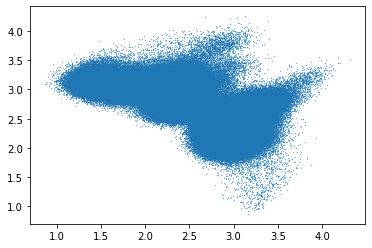

In [9]:
plt.plot(rmsd_closed, rmsd_open, marker=".", ms=0.5, ls='None') 

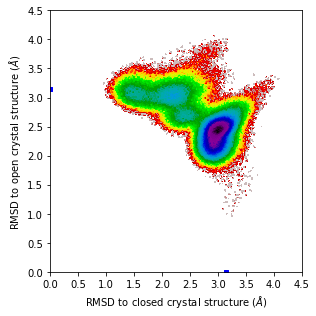

In [49]:
fig, ax = plt.subplots(figsize=(4.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed, rmsd_open, nbins=200,ax=ax, cbar=False)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd.png', dpi=800)

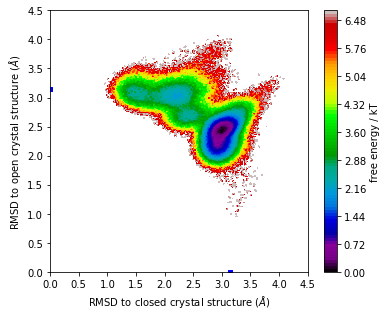

In [85]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed, rmsd_open, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_cmap.png', dpi=800)

In [9]:
indir = './traj_IPA_dry'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list2 = sorted(glob(indir+'/*.nc'))
traj_list2

['./traj_IPA_dry/open_ipa_dry_1.nc',
 './traj_IPA_dry/open_ipa_dry_2.nc',
 './traj_IPA_dry/open_ipa_dry_3.nc',
 './traj_IPA_dry/open_ipa_dry_4.nc',
 './traj_IPA_dry/open_ipa_dry_5.nc']

In [10]:
results_open_ipa=[]
results_closed_ipa=[]
for t in traj_list2:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa.append(rmsd_closed_ipa)
    
    rmsd_open_ipa=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa.append(rmsd_open_ipa)

In [11]:
rmsd_open_ipa=np.concatenate(results_open_ipa, axis=0)
rmsd_closed_ipa=np.concatenate(results_closed_ipa, axis=0)

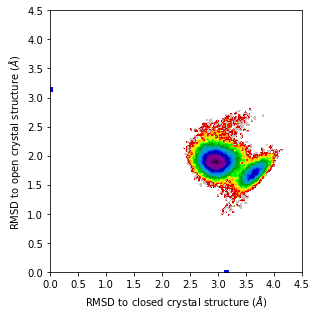

In [137]:
fig, ax = plt.subplots(figsize=(4.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa, rmsd_open_ipa, nbins=80,ax=ax, cbar=False)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_IPA.png', dpi=800)

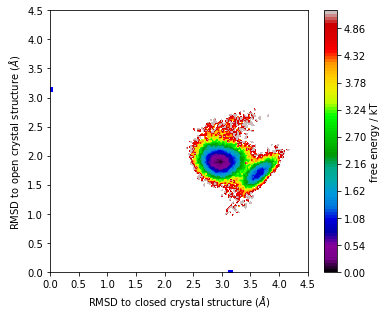

In [12]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa, rmsd_open_ipa, nbins=80,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_IPA_cmap.png', dpi=800)

In [58]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/open*.nc'))
traj_list3

['./traj_dry_open_closed_adapt_all/open2_all_dry_1.nc',
 './traj_dry_open_closed_adapt_all/open2_all_dry_2.nc',
 './traj_dry_open_closed_adapt_all/open2_all_dry_3.nc',
 './traj_dry_open_closed_adapt_all/open2_all_dry_4.nc',
 './traj_dry_open_closed_adapt_all/open2_all_dry_5.nc',
 './traj_dry_open_closed_adapt_all/open_all_dry_1.nc',
 './traj_dry_open_closed_adapt_all/open_all_dry_2.nc',
 './traj_dry_open_closed_adapt_all/open_all_dry_3.nc',
 './traj_dry_open_closed_adapt_all/open_all_dry_4.nc',
 './traj_dry_open_closed_adapt_all/open_all_dry_5.nc']

In [59]:
results_open_openonly=[]
results_closed_openonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_openonly.append(rmsd_closed_openonly)
    
    rmsd_open_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_openonly.append(rmsd_open_openonly)

In [67]:
rmsd_open_openonly=np.concatenate(results_open_openonly, axis=0)
rmsd_closed_openonly=np.concatenate(results_closed_openonly, axis=0)

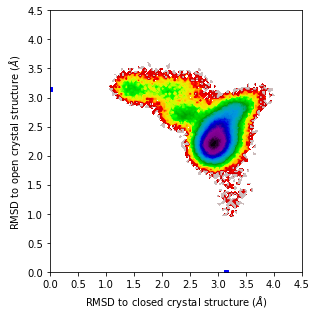

In [87]:
fig, ax = plt.subplots(figsize=(4.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=100,ax=ax, cbar=False)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly.png', dpi=800)

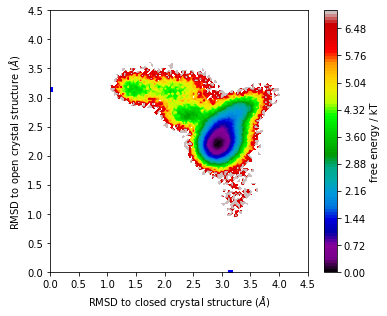

In [88]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_cmap.png', dpi=800)

In [62]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/closed*.nc'))
traj_list3

['./traj_dry_open_closed_adapt_all/closed2_all_dry_1.nc',
 './traj_dry_open_closed_adapt_all/closed2_all_dry_2.nc',
 './traj_dry_open_closed_adapt_all/closed2_all_dry_3.nc',
 './traj_dry_open_closed_adapt_all/closed2_all_dry_4.nc',
 './traj_dry_open_closed_adapt_all/closed2_all_dry_5.nc',
 './traj_dry_open_closed_adapt_all/closed_all_dry_1.nc',
 './traj_dry_open_closed_adapt_all/closed_all_dry_2.nc',
 './traj_dry_open_closed_adapt_all/closed_all_dry_3.nc',
 './traj_dry_open_closed_adapt_all/closed_all_dry_4.nc',
 './traj_dry_open_closed_adapt_all/closed_all_dry_5.nc']

In [69]:
results_open_closedonly=[]
results_closed_closedonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

In [70]:
rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

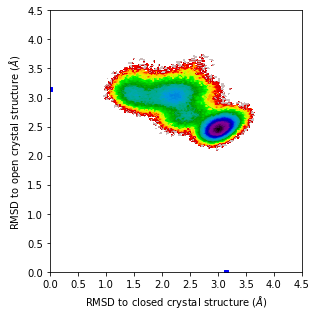

In [89]:
fig, ax = plt.subplots(figsize=(4.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=100,ax=ax, cbar=False)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly.png', dpi=800)

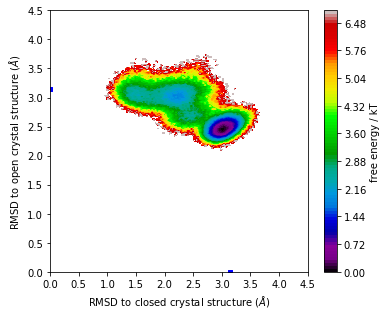

In [97]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_cmap.png', dpi=800)

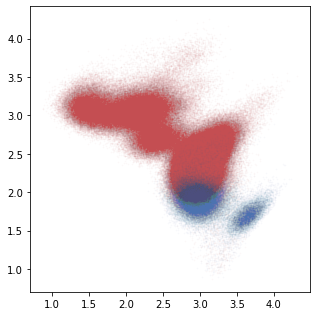

In [140]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed, rmsd_open, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa, rmsd_open_ipa, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

#ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

#ax.set_xticks(np.arange(0, 5, 0.5))
#ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/rmsd_w_wo_IPA.png', dpi=800)

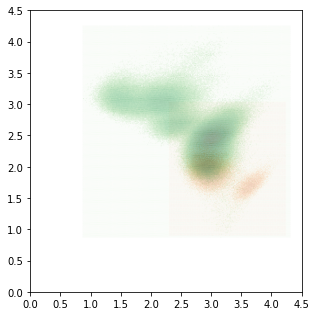

In [147]:
fig,ax=plt.subplots(figsize=(4.5,4.5))


ax.hexbin(rmsd_closed_ipa, rmsd_open_ipa, cmap="Oranges", alpha=0.5, bins='log',
          gridsize=200, edgecolors='none', linewidths=0.0) 
ax.hexbin(rmsd_closed, rmsd_open,cmap="Greens", alpha=0.5, bins='log',
          gridsize=200, edgecolors='none', linewidths=0.0) 



ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

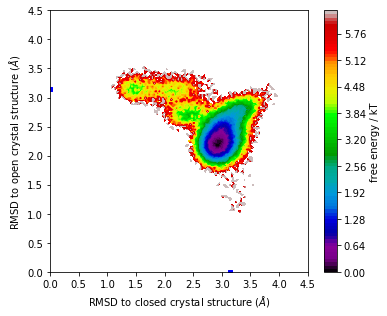

In [15]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/open*.nc'))

results_open_openonly=[]
results_closed_openonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_openonly.append(rmsd_closed_openonly)
    
    rmsd_open_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_openonly.append(rmsd_open_openonly)

rmsd_open_openonly=np.concatenate(results_open_openonly, axis=0)
rmsd_closed_openonly=np.concatenate(results_closed_openonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_dt2_cmap.png', dpi=800)

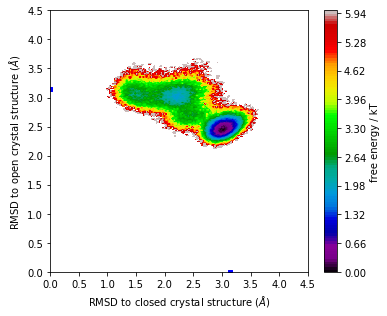

In [16]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list4 = sorted(glob(indir+'/closed*.nc'))

results_open_closedonly=[]
results_closed_closedonly=[]
for t in traj_list4:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_dt2_cmap.png', dpi=800)

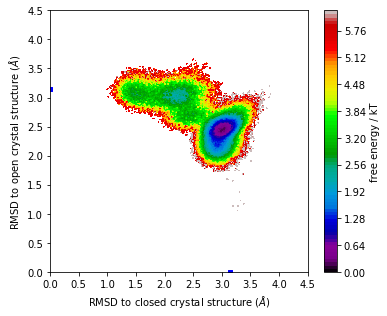

In [17]:
traj_list=traj_list4+traj_list3
for t in traj_list:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedopenonly_dt2_cmap.png', dpi=800)

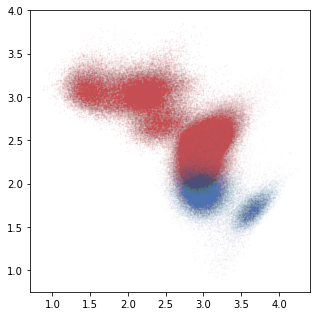

In [18]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
#ax.plot(rmsd_closed, rmsd_open, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa, rmsd_open_ipa, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

#ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

#ax.set_xticks(np.arange(0, 5, 0.5))
#ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()